In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 15)
#pd.set_option('display.max_columns', 10)

In [3]:
# 使用 scikit-learn 提供的鳶尾花資料庫
iris = load_iris()
iris

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

In [4]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


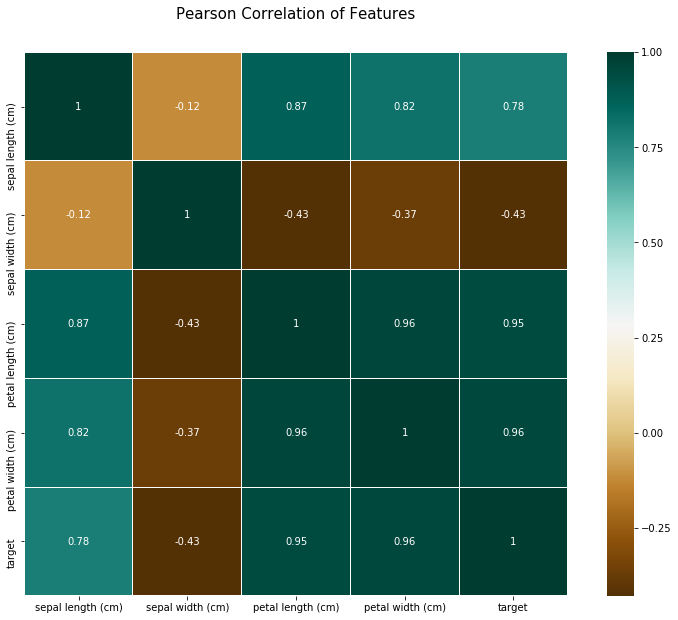

In [5]:
plt.figure(figsize=(14,10))
# y=標題跟圖的距離, size=字體大小
plt.title("Pearson Correlation of Features", y=1.05, size=15)
# cmap=圖每格顏色, linewidths=格子間的寬度, square=True 將格子設為正方形, linecolor=格子間線的顏色, annot=True 顯示相關係數
sns.heatmap(df.astype(float).corr(), cmap="BrBG", linewidths=0.1, square=True, linecolor="white", annot=True)

target資料與petal(花瓣)長寬有高度正相關

In [6]:
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.1)

In [7]:
from sklearn.tree import DecisionTreeClassifier
# 創建一個classfier, max_depth=樹的深度
clf = DecisionTreeClassifier(max_depth=3)
# 使用 fit 將訓練數據餵進來
clf = clf.fit(x_train, y_train)

在終端機安裝 graphviz
apt-get update
apt-get install -y graphviz libgraphviz-dev pkg-config

In [8]:
# 繪製決策樹
#!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

In [9]:
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, 
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

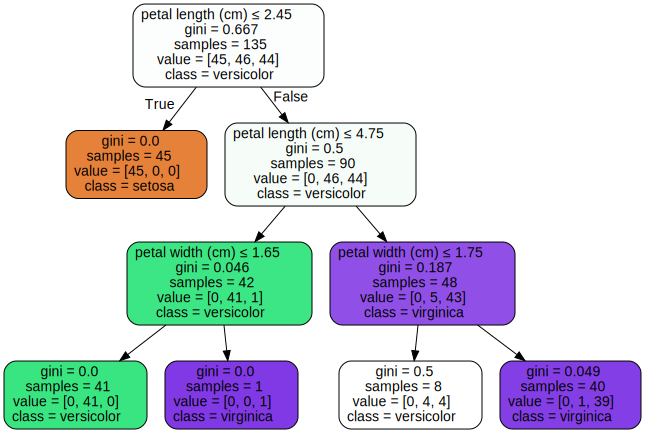

In [10]:
# 可輸出pdf
#graph.render("iris_ClassificationTree")
graph

In [11]:
from sklearn.metrics import accuracy_score
predict = clf.predict(x_test)
print("預測:", predict)
print("正確標籤:", y_test)
print("正確率:", accuracy_score(y_test, predict)*100, "%")

預測: [1 0 2 2 2 0 1 0 1 0 2 0 2 1 2]
正確標籤: [1 0 2 2 2 0 1 0 1 0 2 0 2 1 2]
正確率: 100.0 %


In [12]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
pd.DataFrame(cm)

,0,1,2
0,5,0,0
1,0,4,0
2,0,0,6


In [13]:
# 檢視分類器對於每個特徵的看重程度
clf.feature_importances_

array([ 0.       ,  0.       ,  0.9409686,  0.0590314])